## Experimenting with $P_{hm}$ for BAO:

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# Load data

def get_powers(low_k_cut=0.01, high_k_cut=1, fid='HF'):
    if fid == 'HF':
        pk_files = ['/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF/all_powerspectra_12.3.txt',
                    '/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF/all_powerspectra.txt']
    elif fid == 'L2':
        pk_files = ['/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2/all_powerspectra_L2_12.3.txt',
                    '/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2/all_powerspectra.txt']    
    mass_thresholds = [12.3, 11.5]
    powers = {}
    for i in range(len(pk_files)):
        a = np.loadtxt(pk_files[i], skiprows=1)
        # Remove rows where the first column is less than or equal to 0.01
        ind = np.where((a[:, 0] > low_k_cut) & (a[:, 0] < high_k_cut))[0]
        a = a[ind, :]
        powers[mass_thresholds[i]] = {}
        powers[mass_thresholds[i]]['k'] = a[:, 0]
        powers[mass_thresholds[i]]['plin'] = a[:, 1]
        powers[mass_thresholds[i]]['phlin'] = a[:, 2]
    return powers

from scipy.optimize import curve_fit
def model(k, g0, g2, g4, sigma_d):
    return (g0 + g2 * k**2 + g4 * k**4) * np.exp(-1 * sigma_d**2 * k**2 / 2)

def fit_gk(k, plin, phm):
    """
    Fit the equation below to P_hm / P_lin
    G(k) = (g_0 + g_2 k^2 + g_4 k^4) exp(- sigma_d^2_lin k^2 / 2 )
    where sigma_d = 1/2*pi^2 \int P_lin(k) dk
    Parameters:
    k : array_like
    Plin : array_like
    Phm : array_like
    Returns:
    g0, g2, g4, sigma : float
    """
    #sigma_d = 1/(2*np.pi**2) * np.trapz(plin, k)
    popt, _ = curve_fit(model, k, phm/plin)
    return popt[0], popt[1], popt[2], popt[3]       
    
def plot_power_spectra(fig=None, ax=None, fid='HF'):
    power = get_powers(fid=fid)

    # Plotting
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 3, figsize=(16, 5))
    for i, mth in enumerate(power.keys()):
        g0, g2, g4, sigma_d = fit_gk(power[mth]['k'], power[mth]['plin'], power[mth]['phlin'])
        fit_model = model(power[mth]['k'], g0, g2, g4, sigma_d)
        if i == 0:
            ax[0].plot(power[mth]['k'], power[mth]['plin'], label=fr'$P_{{lin}}$')
        ax[0].plot(power[mth]['k'], power[mth]['phlin'], label=fr'$P_{{lin}},\, M>{mth}$')
        ax[1].plot(power[mth]['k'], power[mth]['phlin'] / power[mth]['plin'], label=fr'$P_{{hlin}}/P_{{lin}},\, M>{mth}$')
        ax[1].plot(power[mth]['k'], fit_model, label=fr'$G(k),\, M>{mth}$', ls='--')
        # Third plot: ratio and fit model
        if len(ax) < 3:
            # Add a third axis if not present
            fig.subplots_adjust(right=0.75)
            ax.append(fig.add_axes([0.75, 0.15, 0.22, 0.7]))
        ax[2].plot(power[mth]['k'], (power[mth]['phlin'] / power[mth]['plin'])/fit_model, label=fr'$P_{{hlin}}/P_{{lin}} / G(k),\, M>{mth}$')
    ax[2].set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')
    ax[2].set_ylabel('G(k) / fit')
    ax[2].grid(which='both', linestyle='--', alpha=0.5)
    ax[2].legend()

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')
    ax[0].set_ylabel('$P(k)$')
    ax[0].legend()
    ax[1].set_xlabel('$k \, [h \, \mathrm{Mpc}^{-1}]$')
    ax[1].legend()


## For HF:

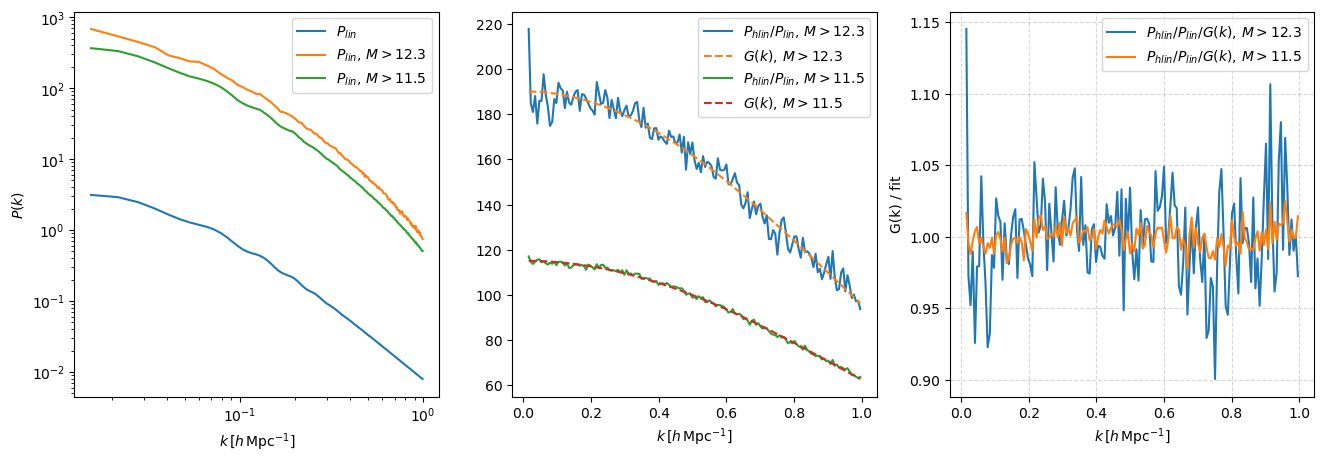

In [5]:
plot_power_spectra(fid='HF')

## For L2:

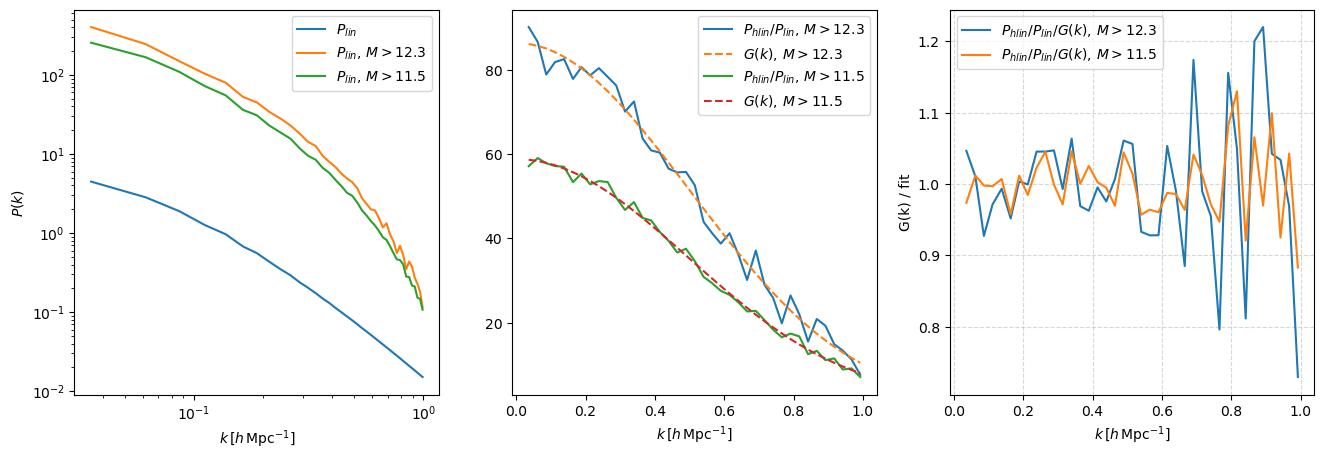

In [2]:
plot_power_spectra(fid='L2')

Simpel check for the full list of the powers:

<KeysViewHDF5 ['k_hlin', 'k_init', 'mbins', 'power_hlin', 'power_init', 'sim_tag']>
(21, 500)


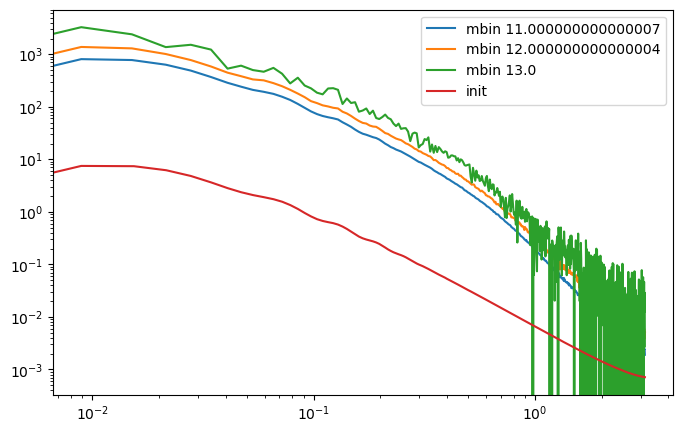

In [25]:
import h5py, numpy as np
import matplotlib.pyplot as plt
basedir = '/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/HF/'
savefile = basedir + 'power_compressed_10p_Box1000_Part3000_0024.hdf5'

with h5py.File(savefile, 'r') as f:
    print(f.keys())
    print(f['power_hlin'].shape)
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.plot(f['k_hlin'][:], f['power_hlin'][20,:], label=f'mbin {f["mbins"][20]}')
    ax.plot(f['k_hlin'][:], f['power_hlin'][10,:], label=f'mbin {f["mbins"][10]}')
    ax.plot(f['k_hlin'][:], f['power_hlin'][0,:], label=f'mbin {f["mbins"][0]}')
    ax.plot(f['k_init'][:], f['power_init'][:], label='init')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()

<KeysViewHDF5 ['k_hlin', 'k_init', 'mbins', 'power_hlin', 'power_init', 'sim_tag']>
(21, 125)


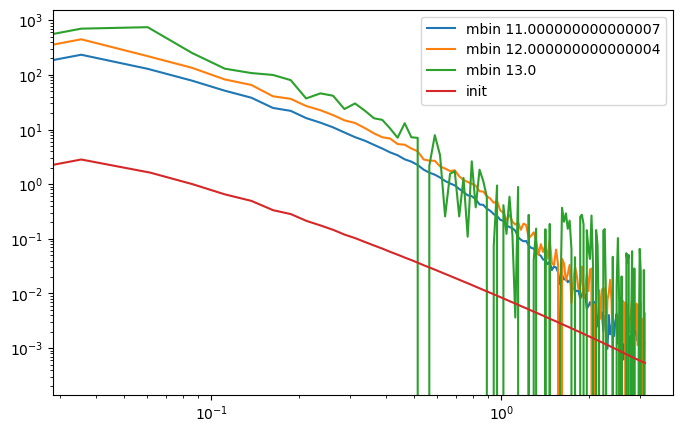

In [24]:
import h5py, numpy as np
import matplotlib.pyplot as plt
basedir = '/home/qezlou/HD2/HETDEX/cosmo/data/power_hlin/L2/'
savefile = basedir + 'power_compressed_10p_Box250_Part750_0000.hdf5'

with h5py.File(savefile, 'r') as f:
    print(f.keys())
    print(f['power_hlin'].shape)
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.plot(f['k_hlin'][:], f['power_hlin'][20,:], label=f'mbin {f["mbins"][20]}')
    ax.plot(f['k_hlin'][:], f['power_hlin'][10,:], label=f'mbin {f["mbins"][10]}')
    ax.plot(f['k_hlin'][:], f['power_hlin'][0,:], label=f'mbin {f["mbins"][0]}')
    ax.plot(f['k_init'][:], f['power_init'][:], label='init')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()